# Se importan las funciones y <font color="green"> librerías</font>

In [1]:
from sympy.interactive import printing
printing.init_printing(use_latex=True)
from sympy import *
import sympy as sp
import math

In [2]:
##### Creación variable simbólica #####
t = sp.symbols('t')

i = sp.Function('i')

#####  Constantes  #####
R = 10 # [OHM]
C = 8*10**-3 # [F]
L = 20 # [H]

#####  Fuente de entrada  #####
Ien = 4 #[A]
Iss = Ien

alpha = 1/(2*R*C)
omega = 1/math.sqrt(L*C)
print("alpha = ",alpha, " y omega = ",omega)
if alpha > omega:
  print("Movimiento sobre amortiguado")
elif alpha == omega:
  print("Movimiento criticamente amortiguado")
else:
  print("Movimiento sub-amortiguado")

alpha =  6.25  y omega =  2.5
Movimiento sobre amortiguado


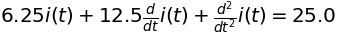

In [3]:
##### Corriente del inductor  #####
diffeq = Eq( i(t).diff(t,t)+ 1 / (R*C) * i(t).diff(t) + 1 / (L*C) * i(t), Iss / (L*C) )

diffeq

In [4]:
#####  Condiciones Iniciales  #####
Vo = 15 # [V]
Io = 4 # [A]

dio = Vo/L

#####  Se resuelve la ecuación diferencial para la respuesta complementaria  #####
i_t = sp.dsolve(sympify(diffeq),ics={i(0):Io, i(t).diff(t).subs(t, 0): dio})
i_t

### Primero se evalua la respuesta del circuito en <font color="green">$t = 100 [ms]$</font> y luego se <font color="green">grafica</font>


In [5]:
## Otros paquetes útiles
from IPython.core.display import HTML, display, Javascript, clear_output
from ipywidgets import interact, interactive, fixed, interact_manual
from ipywidgets import interactive
from bqplot import pyplot as plt
import numpy as np

In [6]:
def unidades(x):#Función para deducir las unidades
    return {
        'ms': 10**(-3),
        's': 1
    }.get(x, 0)

In [7]:
def f(time):
    y = np.zeros(len(time))
    index = np.arange(len(time))
    for ind in index:
        y[ind] = float(i_t.args[1].subs(t,time[ind]))
    return y

In [8]:
@interact_manual( xmax=(0,10.0,0.5), evaluar_t=("") )
def graficacion( xmax,evaluar_t ):
    try:
        plt.clear()
        tmp = evaluar_t.split(" ")
        t1 = float(tmp[0])
        t1 *= float( unidades(tmp[1]) )
        print("El valor de corriente para %s [%s] es" % (tmp[0],tmp[1]))
        print("i( "+tmp[0]+" ["+tmp[1]+"] ) = %.4f [A]" % i_t.args[1].subs(t,t1) )
        
        # Se grafican los datos
        xmin = 0.0
        step = 10*10**-3
        x = np.arange(0.0,xmax,step) 
        y = f(x)
        plt.title("Corriente del circuito") 
        plt.xlabel("[t]")
        plt.ylabel("[A]")
        plt.plot(x,y,"g")
        plt.show()
    except:
        print("Error: Ingrese el parametro evaluar_t adecuadamente en el formato: <magnitud> <unidades: ms o s>, ejemplo: 100 ms")

interactive(children=(FloatSlider(value=5.0, description='xmax', max=10.0, step=0.5), Text(value='', descripti…